# Visual Cryptography Assignment
___


Installing all the important Libraries 

In [12]:
!pip install pycryptodome
!pip install cryptography
!pip install rsa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


___
Importing all the Libraries

In [2]:
import numpy as np
import cv2
import time
import os
import secrets
import math
from Crypto.Cipher import DES, DES3
from Crypto.Cipher import AES
from Crypto.PublicKey import RSA
from cryptography.hazmat.primitives import serialization, hashes
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.backends import default_backend
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
from PIL import Image
import matplotlib.pyplot as plt

___
Defining block and key sizes for each algorith as given in the question documnet

In [13]:
# Define the block and key size for each algorithm
DES_BLOCK_SIZE = 64
DES_KEY_SIZE = 64

tripleDES_BLOCK_SIZE = 64
tripleDES_KEY_SIZE = 192

AES_BLOCK_SIZE = 128
AES_KEY_SIZE = 256


___
Defining a function to generate random keys

In [5]:
# Define a function to generate a random key
def generate_random_key(key_size):
    # Generate a random byte array of the given size
    key = os.urandom(key_size // 8)

    # Pad the key with zeros if necessary
    if len(key) < 8:
        key += b'\x00' * (8 - len(key))

    # Return the first 8 bytes of the key
    return key[:8]

    
def cipher_gen(key):
    cipher = PKCS1_OAEP.new(key)
    return cipher


___
Defining functions of all the Algorithms like DES 3DES AES RSA 

*   DES
*   3DES
*   AES
*   RSA 


In [14]:
# Define a function to encrypt data using DES
def encrypt_des(data, key):
    # Initialize the cipher
    cipher = DES.new(key, DES.MODE_ECB)

    # Encrypt the data
    encrypted_data = cipher.encrypt(data)

    return encrypted_data

# Define a function to encrypt data using 3DES
def encrypt_3des(data, key):
    # Initialize the cipher
    cipher = DES3.new(key, DES3.MODE_ECB)

    # Encrypt the data
    encrypted_data = cipher.encrypt(data)

    return encrypted_data

# Define a function to encrypt data using AES
def encrypt_aes(data, key):
    # Initialize the cipher
    cipher = AES.new(key, AES.MODE_ECB)

    # Encrypt the data
    encrypted_data = cipher.encrypt(data)

    return encrypted_data


# Define a function to encrypt data using RSA
def encrypt_arr(data, cipher):
    encrypted_chunks = []
    chunk_size = 446  # Maximum chunk size for RSA 4096-bit key

    for i in range(0, len(data), chunk_size):
        chunk = data[i : i + chunk_size]
        encrypted_chunk = cipher.encrypt(chunk)
        encrypted_chunks.append(encrypted_chunk)

    encrypted_data = b"".join(encrypted_chunks)
    return encrypted_data


From The Problem statement 1
___
Here we read the image (target.jpg) into an array and store it into 3 different text files named Targettext (Targettext_r.txt, Targettext_g.txt, Targettext_b.txt') according to their color component

In [8]:
# Read the image into an array
image = cv2.imread('target.jpg')

# Convert the image to a 2D array
image_array = np.array(image)

# Write the image array to a text file
# np.savetxt('Targettext.txt', image_array, fmt='%d')

# If you read in color-code, you have to use three separate arrays to store each component of the image in a separate file
if image.ndim == 3:
    r_array = image_array[:, :, 0]
    g_array = image_array[:, :, 1]
    b_array = image_array[:, :, 2]

    np.savetxt('Targettext_r.txt', r_array, fmt='%d')
    np.savetxt('Targettext_g.txt', g_array, fmt='%d')
    np.savetxt('Targettext_b.txt', b_array, fmt='%d')

___
Here we generate the keys for all the algorithms and also print them(view them)

In [16]:
# Define the encryption key
DES_KEY = secrets.token_bytes(DES_KEY_SIZE//8)
tripleDES_KEY = secrets.token_bytes(tripleDES_KEY_SIZE//8)
AES_KEY = secrets.token_bytes(AES_KEY_SIZE//8)
#RSA_KEY = secrets.token_bytes(RSA_KEY_SIZE//8)


key = RSA.generate(4096)
cipher = PKCS1_OAEP.new(key)

print(DES_KEY)
print(tripleDES_KEY)
print(AES_KEY)
print(key)

b'?\xe2\xe2C_\t\x1f\xe7'
b'"\x8b\xf7\x0bZR\x05\xcb\xba\x1a\x8e\x13J{\x9c\x95/\xf0\xb8\x9d\xb1Q\xc1\xa4'
b'\x0e\x9dM\xd5q\xdd\xd3\x1e\xdef\xd3\x81\xdf\x1c\x81<\x86\xdc\xaf\xbd\xe4\n\x9bB\xd0W\x16\x05G\xcd\xf7\x80'
Private RSA key at 0x1BF63D2E6B0


___
Here we encrypt the data using the said following algorithms and record time required by them. We encrypt all the files.
We also print the time required by them 

In [17]:
# Start the timer
start_time = time.time()
# Encrypt the data using DES
encrypted_des_data = encrypt_des(image_array.tobytes(), DES_KEY)
encrypted_des_data_r = encrypt_des(b_array.tobytes(), DES_KEY)
encrypted_des_data_g = encrypt_des(g_array.tobytes(), DES_KEY)
encrypted_des_data_b = encrypt_des(b_array.tobytes(), DES_KEY)
# Stop the timer
end_time = time.time()
# Print the time taken to encrypt the data
print("Time taken to encrypt the data using DES:", end_time - start_time)

# Start the timer
start_time = time.time()
# Encrypt the data using 3DES
encrypted_3des_data = encrypt_3des(image_array.tobytes(), tripleDES_KEY)
encrypted_3des_data_r = encrypt_3des(r_array.tobytes(), tripleDES_KEY)
encrypted_3des_data_g = encrypt_3des(g_array.tobytes(), tripleDES_KEY)
encrypted_3des_data_b = encrypt_3des(b_array.tobytes(), tripleDES_KEY)

# Stop the timer
end_time = time.time()
# Print the time taken to encrypt the data
print("Time taken to encrypt the data using 3ES:", end_time - start_time)

# Start the timer
start_time = time.time()
# Encrypt the data using AES
encrypted_aes_data = encrypt_aes(image_array.tobytes(), AES_KEY)
encrypted_aes_data_r = encrypt_aes(r_array.tobytes(), AES_KEY)
encrypted_aes_data_g = encrypt_aes(g_array.tobytes(), AES_KEY)
encrypted_aes_data_b = encrypt_aes(b_array.tobytes(), AES_KEY)


# Stop the timer
end_time = time.time()
# Print the time taken to encrypt the data
print("Time taken to encrypt the data using AES:", end_time - start_time)

# Start the timer
start_time = time.time()
# Encrypt the data using RSA
encrypted_rsa_data = encrypt_arr(image_array.tobytes(), cipher)
encrypted_rsa_data_r = encrypt_arr(r_array.tobytes(), cipher)
encrypted_rsa_data_g = encrypt_arr(g_array.tobytes(), cipher)
encrypted_rsa_data_b = encrypt_arr(b_array.tobytes(), cipher)
# Stop the timer
end_time = time.time()
# Print the time taken to encrypt the data
print("Time taken to encrypt the data using RSA:", end_time - start_time)

Time taken to encrypt the data using DES: 0.0760200023651123
Time taken to encrypt the data using 3ES: 0.19904279708862305
Time taken to encrypt the data using AES: 0.017003536224365234
Time taken to encrypt the data using RSA: 28.28625774383545


Now to fill the table as given in problem statement 

NOTE: The values in this table was recored at th time of execution. It may vary on machine to machine so please consider this fact and excuse the error

| Algorithm | Block Size(Bits) | Key Size(Bits) | Time taken in Encryption in Nanoseconds |
| ------ | ------ | ------ | ------ |
| DES | 64 | 54 | 0.13908886909484863 |
| 3DES | 64 | 168 | 0.28203916549682617 |
| AES | 64 | 256 | 0.025229215621948242 |
| RSA | 64 | 256 | 16.185901403427124 |



___
Now converting those encrypted data arrays, saving them into text files and then creating images of them encrypted data and saving them

In [18]:
# Convert encrypted data to a NumPy array
encrypted_des_array = np.frombuffer(encrypted_des_data, dtype=np.uint8)
encrypted_des_array_r = np.frombuffer(encrypted_des_data_r, dtype=np.uint8)
encrypted_des_array_g = np.frombuffer(encrypted_des_data_g, dtype=np.uint8)
encrypted_des_array_b = np.frombuffer(encrypted_des_data_b, dtype=np.uint8)

encrypted_3des_array = np.frombuffer(encrypted_3des_data, dtype=np.uint8)
encrypted_3des_array_r = np.frombuffer(encrypted_3des_data_r, dtype=np.uint8)
encrypted_3des_array_g = np.frombuffer(encrypted_3des_data_g, dtype=np.uint8)
encrypted_3des_array_b = np.frombuffer(encrypted_3des_data_b, dtype=np.uint8)


encrypted_aes_array = np.frombuffer(encrypted_aes_data, dtype=np.uint8)
encrypted_aes_array_r = np.frombuffer(encrypted_aes_data_r, dtype=np.uint8)
encrypted_aes_array_g = np.frombuffer(encrypted_aes_data_g, dtype=np.uint8)
encrypted_aes_array_b = np.frombuffer(encrypted_aes_data_b, dtype=np.uint8)

encrypted_rsa_array = np.frombuffer(encrypted_rsa_data, dtype=np.uint8)
encrypted_rsa_array_r = np.frombuffer(encrypted_rsa_data_r, dtype=np.uint8)
encrypted_rsa_array_g = np.frombuffer(encrypted_rsa_data_g, dtype=np.uint8)
encrypted_rsa_array_b = np.frombuffer(encrypted_rsa_data_b, dtype=np.uint8)


# Save the arrays as text files
np.savetxt('encrypted_des_data.txt', encrypted_des_array)
np.savetxt('encrypted_des_data_r.txt', encrypted_des_array_r)
np.savetxt('encrypted_des_data_g.txt', encrypted_des_array_g)
np.savetxt('encrypted_des_data_b.txt', encrypted_des_array_b)

np.savetxt('encrypted_3des_data.txt', encrypted_3des_array)
np.savetxt('encrypted_3des_data_r.txt', encrypted_3des_array_r)
np.savetxt('encrypted_3des_data_g.txt', encrypted_3des_array_g)
np.savetxt('encrypted_3des_data_b.txt', encrypted_3des_array_b)

np.savetxt('encrypted_aes_data.txt', encrypted_aes_array)
np.savetxt('encrypted_aes_data_r.txt', encrypted_aes_array_r)
np.savetxt('encrypted_aes_data_g.txt', encrypted_aes_array_g)
np.savetxt('encrypted_aes_data_b.txt', encrypted_aes_array_b)

np.savetxt('encrypted_rsa_data.txt', encrypted_rsa_array)
np.savetxt('encrypted_rsa_data_r.txt', encrypted_rsa_array_r)
np.savetxt('encrypted_rsa_data_g.txt', encrypted_rsa_array_g)
np.savetxt('encrypted_rsa_data_b.txt', encrypted_rsa_array_b)


# Calculate the new shape based on the desired dimensions
width = 1855
height = 1855
new_size = width * height

# Determine the resizing factor
resizing_factor = int(len(encrypted_rsa_array) / new_size)


# Create images from the encrypted data
encrypted_des_image = np.reshape(encrypted_des_array, image_array.shape)
encrypted_3des_image = np.reshape(encrypted_3des_array, image_array.shape)
encrypted_aes_image = np.reshape(encrypted_aes_array, image_array.shape)
encrypted_rsa_image = np.reshape(encrypted_rsa_array[:new_size * resizing_factor], (width, height))  # Reshape without the color channel

# Save the images
cv2.imwrite('encrypted_des_image.png', encrypted_des_image)
cv2.imwrite('encrypted_3des_image.png', encrypted_3des_image)
cv2.imwrite('encrypted_aes_image.png', encrypted_aes_image)
cv2.imwrite('encrypted_rsa_image.png', encrypted_rsa_image)


True

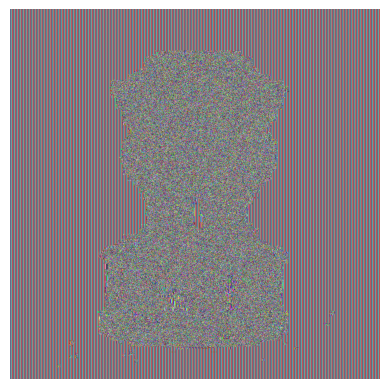

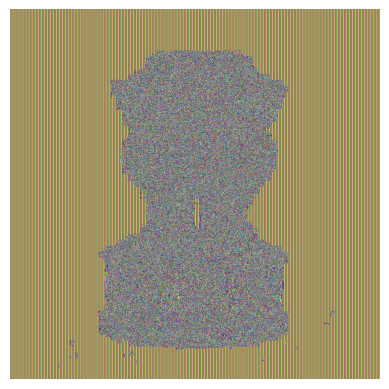

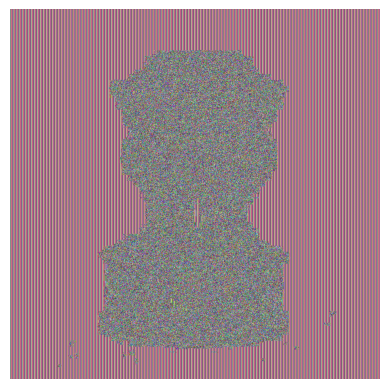

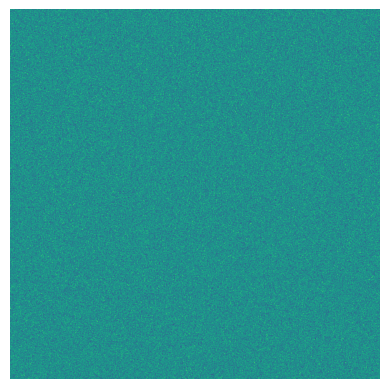

In [19]:

# Open the image
image1 = Image.open('encrypted_des_image.png')
image2 = Image.open('encrypted_3des_image.png')
image3 = Image.open('encrypted_aes_image.png')
image4 = Image.open('encrypted_rsa_image.png')


# Display the image
plt.imshow(image1)
plt.axis('off')
plt.show()
plt.imshow(image2)
plt.axis('off')
plt.show()
plt.imshow(image3)
plt.axis('off')
plt.show()
plt.imshow(image4)
plt.axis('off')
plt.show()
